In [184]:
# Name :- lUXSHAN S.
# Index No :- 190364C
# Github Link :- https://github.com/luxshan21/Image_Processing_Works_190364C.git

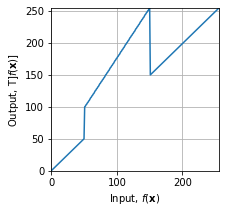

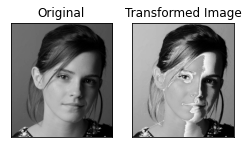

In [196]:
# Question 1
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
c= np.array([(50,50),(50,100),(150,255),(150,150),(255,255)])# points in graph
t1 = np.linspace(0, c[0,1], c[0,0] + 1-0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1,1], c[1,0]-c[0,0]).astype('uint8')# lines
t3 = np.linspace(c[1,1], c[2,1], c[2,0]-c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1], c[3,1], c[3,0]-c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1], c[4,1], c[4,0]-c[3,0]).astype('uint8')
transform = np.concatenate((t1,t2,t3,t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
plt.figure(figsize=(3,3))
plt.plot(transform)
plt.xlabel(r'Input, $f(\mathbf {x})$')
plt.ylabel('Output, $\mathrm{T}]f(\mathbf {x})]$')
plt.xlim (0,255),plt.ylim (0,255)
plt. savefig('transform.png'),plt.grid()
img_orig = cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)
fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(4,4))
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original'),axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image_transformed, cmap='gray')
axes[1].set_title('Transformed Image'),axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

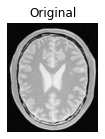

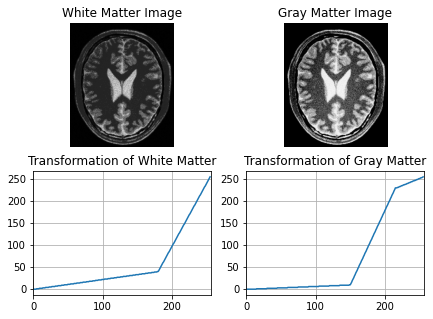

In [197]:
# Question 2 (a) (b)
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img_orig = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(3,2)),plt.axis('off')
plt.title('Original'),plt.imshow(img_orig, cmap = 'gray')
transform_1 = np.linspace(0, 40, 180)  
transform_2 = np.linspace(40, 255, 76)
transformation=np.concatenate([transform_1,transform_2],axis=0).astype(np.uint8)
transformed = cv.LUT(img_orig, transformation)
fig, ax = plt.subplots(2,2, figsize=(7,5))
ax[0,0].axis('off'),ax[0,0].set_title("White Matter Image")
ax[0,0].imshow(transformed, cmap = 'gray',vmin =0, vmax=255)
ax[1,0].plot(transformation),ax[1,0].grid()
ax[1,0].set_title('Transformation of White Matter'),ax[1,0].set_xlim([0,256])
transform_1 = np.linspace(0, 10, 150) 
transform_2 = np.linspace(10, 230 ,66)
transform_3 = np.linspace(230,255,40)
transformation=np.concatenate([transform_1,transform_2,transform_3],axis=0).astype(np.uint8)
transformed = cv.LUT(img_orig, transformation)
ax[0,1].axis('off'),ax[0,1].set_title("Gray Matter Image")
ax[0,1].imshow(transformed, cmap = 'gray',vmin =0, vmax=255)
ax[1,1].plot(transformation),ax[1,1].grid()
ax[1,1].set_title('Transformation of Gray Matter'),ax[1,1].set_xlim([0, 256])
plt.show()

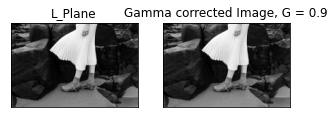

In [198]:
# Question 3 (a)
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img_orig = cv.imread('highlights_and_shadows.jpg', cv.COLOR_BGR2LAB)
lab = cv.cvtColor(img_orig,cv.COLOR_BGR2LAB)
L,A,B=cv.split(lab) # split each planes
gamma = 0.9
t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
image_transformed = cv.LUT(L, t) 
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(5,2))
axes[0].imshow(L, cmap='gray'),axes[0].set_title("L_Plane"),axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].imshow(image_transformed, cmap='gray')
axes[1].set_title('Gamma corrected Image, G = 0.9')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

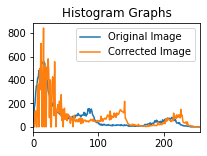

In [199]:
# Question 3 (b)
hist = cv.calcHist([img_orig], [0], None, [256], [0,256])
plt.figure(figsize=(3,2))
plt.plot(hist),plt.xlim([0,256])
hist = cv.calcHist([image_transformed], [0], None, [256], [0,256])
plt.plot(hist),plt.title("Histogram Graphs")
plt.legend(["Original Image", "Corrected Image"], loc ="upper right")
plt.xlim([0,256])
plt.show()

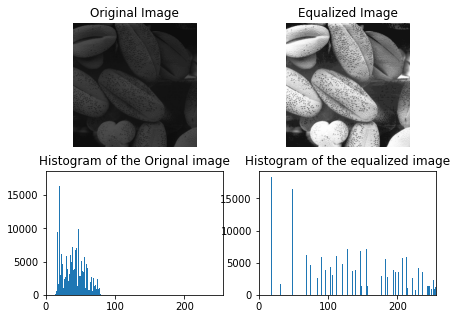

In [214]:
# Question 4
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread("shells.png",cv.IMREAD_GRAYSCALE) 
def Histogram_Equalization(image):
    hist ,bins = np.histogram(image.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf*(len(hist)-1)/cdf.max()
    transformation = cdf_normalized.astype(int)
    equalized_image = cv.LUT(image, transformation)
    return equalized_image
equalized_image = Histogram_Equalization(img)
fig, ax = plt.subplots(2,2, figsize=(7,5))
ax[0,0].axis('off')
ax[0,0].set_title("Original Image")
ax[0,0].imshow(img, cmap = 'gray',vmin =0, vmax=255)
ax[0,1].axis('off')
ax[0,1].set_title('Equalized Image')
ax[0,1].imshow(equalized, cmap = 'gray',vmin =0, vmax=255)
ax[1,0].set_xlim([0, 256])
ax[1,0].set_title('Histogram of the Orignal image')
ax[1,0].hist(img.flatten(), 256, [0, 256]);
ax[1,1].set_xlim([0, 256])
ax[1,1].set_title('Histogram of the equalized image')
ax[1,1].hist(equalized_image.flatten(), 256, [0, 256]);

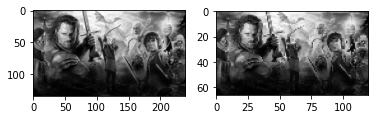

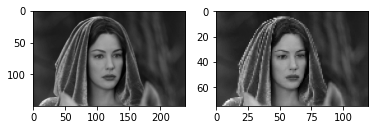

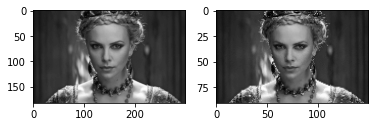

In [211]:
# Question 5 (a)
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt
images = ['im01small.png','im02small.png','im03small.png']
for k in range (0,3):
    im = cv.imread(images[k],cv.IMREAD_REDUCED_GRAYSCALE_2)
    scale = 0.5
    rows = int(scale*im.shape[0]) 
    cols= int(scale*im.shape[1])
    zoomed = np.zeros((rows,cols), dtype=im.dtype) # nearest-neighbor
    for i in range (0,rows):
        for j in range(0,cols):
            zoomed[i,j] = im[int(i/scale),int(j/scale)]        
    plt.subplot(1, 2, 1),plt.imshow(im,cmap='gray')
    plt.subplot(1, 2, 2),plt.imshow(zoomed,cmap='gray')
    plt.show()

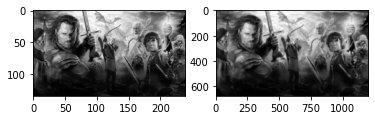

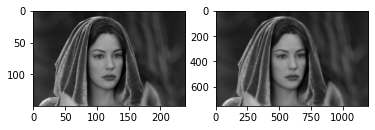

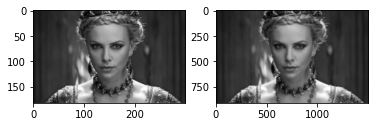

In [213]:
# Question 5 (b)
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt 
images = ['im01small.png','im02small.png','im03small.png']
for k in range (0,3):
    im = cv.imread(images[k],cv.IMREAD_REDUCED_GRAYSCALE_2)
    scale = 5  #bilinear interpolation
    bilinear_img=cv.resize(im,None,fx=scale,fy=scale,interpolation=cv.INTER_LINEAR) 
    plt.subplot(1, 2, 1),plt.imshow(im,cmap='gray')
    plt.subplot(1, 2, 2),plt.imshow(bilinear_img,cmap='gray')
    plt.show()

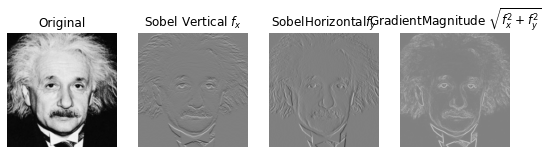

In [203]:
# Question 6 (a)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
f = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np. float32)
sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32) 
f_x = cv.filter2D(f, -1, sobel_v) 
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
f_y = cv.filter2D(f, -1, sobel_h) 
grad_mag = np.sqrt(f_x**2 + f_y**2)                  
fig, ax = plt.subplots (1,4, figsize=(9,3)) 
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255) ,ax[0].set_title('Original')
ax[1].imshow(f_x,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title(r'Sobel Vertical $f_x$')
ax[2].imshow(f_y,cmap="gray", vmin=-1020,vmax=1020)
ax[2].set_title(r'SobelHorizontal$f_y$')
ax[3].imshow(grad_mag, cmap="gray",vmin =-1020, vmax=1020)
ax[3].set_title(r'GradientMagnitude $\sqrt{f_x^2 + f_y^2}$')
for i in range (4):
    ax[i].axis('off')
plt.show()

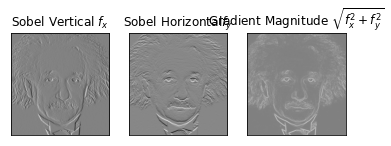

In [204]:
#Question 6 (b)
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt 
img = cv.imread('einstein.png')
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY).astype(float)
sobel_v = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
sobel_h = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)    
edge = np.sqrt(sobel_v**2 + sobel_h**2)                                      
fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(6,3))
axes[0].imshow(sobel_v, cmap='gray'),axes[0].set_title(r'Sobel Vertical $f_x$')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(sobel_h, cmap='gray'),axes[1].set_title(r'Sobel Horizontal$f_y$')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(edge, cmap='gray',vmin =-1020, vmax=1020)
axes[2].set_title(r'Gradient Magnitude $\sqrt{f_x^2 + f_y^2}$')
axes[2].set_xticks([]), axes[1].set_yticks([])
plt.show()

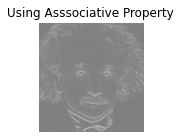

In [205]:
#Question 6 (c)
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
kernel_y1 = np.array([-1, 0, 1], dtype = np.float32)
kernel_y2 = np.array([[-1], [2], [1]], dtype = np.float32)
image_y2 = cv.filter2D(img, -1, kernel_y1)
image_y2 = cv.filter2D(image_y2, -1, kernel_y2)
kernel_x1 = np.array([-1, -2, -1], dtype = np.float32)
kernel_x2 = np.array([[1], [0], [-1]], dtype = np.float32)
image_x2 = cv.filter2D(einstein, -1, kernel_x1)
image_x2 = cv.filter2D(image_x2, -1, kernel_x2)
grad_mag2 = np.sqrt(image_y2**2 + image_x2**2)
plt.figure(figsize=(3,2)),plt.axis('off')
plt.title('Using Asssociative Property')
plt.imshow(grad_mag2, cmap = 'gray', vmin =-1020, vmax=1020)
plt.show()

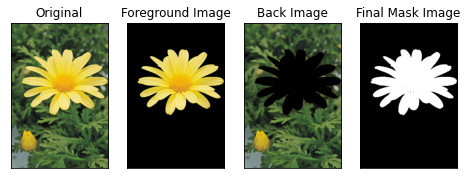

In [206]:
# Question 7 (a)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread('daisy.jpg', cv.IMREAD_COLOR)
assert daisy is not None
img_orig = cv.cvtColor(im, cv.COLOR_BGR2RGB)
fig, axes = plt.subplots(1,4, sharex='all', sharey='all', figsize=(8,4))
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original'),axes[0].set_xticks([]), axes[0].set_yticks([])
mask = np.zeros(img_orig.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (30,70,650,550)
cv.grabCut(img_orig,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
fore = img_orig*mask2[:,:,np.newaxis]
back = img_orig - fore
axes[1].imshow(fore, cmap='gray')
axes[1].set_title('Foreground Image'),axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(back, cmap='gray')
axes[2].set_title('Back Image'),axes[2].set_xticks([]), axes[2].set_yticks([])
axes[3].imshow(mask2, cmap='gray')
axes[3].set_title('Final Mask Image'),axes[3].set_xticks([]), axes[3].set_yticks([])
plt.show()

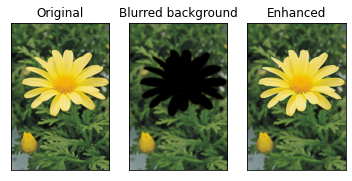

In [207]:
# Question 7 (b)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,3, sharex='all', sharey='all', figsize=(6,3))
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original'),axes[0].set_xticks([]), axes[0].set_yticks([])
blurred_backround = cv.GaussianBlur(back, (9,9), 4)
enhanced = fore + blurred_backround
axes[1].imshow(blurred_backround, cmap='gray')
axes[1].set_title('Blurred background'),axes[1].set_xticks([]),
axes[1].set_yticks([])
axes[2].imshow(enhanced, cmap='gray')
axes[2].set_title('Enhanced'),axes[2].set_xticks([]), axes[2].set_yticks([])
plt.show()

In [ ]:
# Question 7 (c)
 If we use gaussian kernal to blur the backround, then the neighboring dark 
 pixels of the flower affected the backround just beyond the edge of the flower. 
 So, dark pixels replaced the backround flower.  